In [1]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from datetime import datetime
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import joblib
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import RandomizedSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load the train-test split data
X_train, X_test, y_train, y_test = joblib.load('/train_test_split.joblib')

In [5]:
#Define the model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [6]:
# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

In [7]:
#Randomized search
random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=10, scoring='r2', cv=5, random_state=42)

In [8]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'gamma': [0, 0.1, 0.3, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='r2')

In [9]:

# Get the best model
best_model = random_search.best_estimator_

In [10]:
# Evaluate the model
y_pred = best_model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

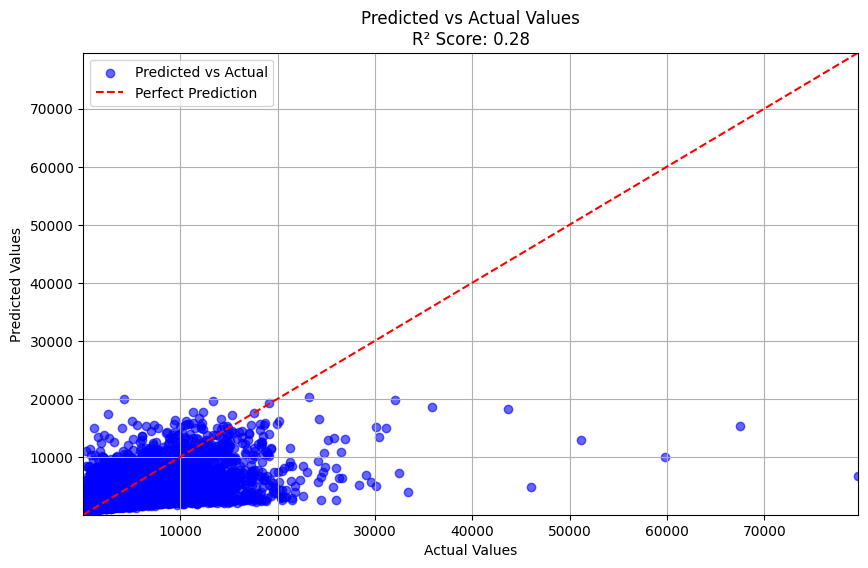

In [20]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')  # Diagonal line
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Predicted vs Actual Values\nR² Score: {r2:.2f}')
plt.legend()
plt.grid()


In [21]:
# Save the plot with a timestamp in the filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")  # Format: YYYYMMDD_HHMMSS
plt.savefig(f'predicted_vs_actual_{timestamp}.png')  # Save as PNG
#plot is not saving, figure out why

<Figure size 640x480 with 0 Axes>

In [22]:
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
plt.show()

Mean Squared Error: 5856460.283374394
R² Score: 0.2822613306135716
